In [ ]:
from graph_tool.all import graph_draw, Graph, min_spanning_tree
import python_codes.files_operators as fo
import numpy as np

def generate_complete_graph_and_mst_with_colors(input_net, output_image, output_net):
    """
    Generate a complete graph using Euclidean distances, calculate its MST,
    set vertex colors by degree, save the MST image, and save it as a .net file.
    
    Parameters:
        input_net (str): Input .net file path containing node positions.
        output_image (str): Output image file path.
        output_net (str): Output .net file path.
    """
    # 读取网络文件，仅获取节点位置
    read_graph, read_pos = fo.read_files(input_net, True)
    num_vertices = read_graph.num_vertices()

    # 创建完全图
    complete_graph = Graph(directed=False)
    complete_graph.add_vertex(num_vertices)
    edge_weights = complete_graph.new_edge_property("double")

    # 添加所有节点之间的边及其权重（欧式距离）
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            source_pos = read_pos[complete_graph.vertex(i)]
            target_pos = read_pos[complete_graph.vertex(j)]
            euclidean_distance = np.sqrt((source_pos[0] - target_pos[0]) ** 2 +
                                         (source_pos[1] - target_pos[1]) ** 2)
            edge = complete_graph.add_edge(i, j)
            edge_weights[edge] = euclidean_distance

    # 计算最小生成树
    mst_edges = min_spanning_tree(complete_graph, weights=edge_weights)
    mst_graph = Graph(directed=False)
    mst_graph.add_vertex(num_vertices)
    mst_graph.add_edge_list((int(e.source()), int(e.target())) for e in complete_graph.edges() if mst_edges[e])

    # 创建最小生成树的节点位置属性
    mst_pos = mst_graph.new_vertex_property("vector<double>")
    for v in mst_graph.vertices():
        mst_pos[v] = read_pos[v]

    # 添加 'number' 属性到 mst_graph
    mst_numbers = mst_graph.new_vertex_property("int")
    for v in mst_graph.vertices():
        mst_numbers[v] = int(v) + 1  # 从 1 开始编号
    mst_graph.vertex_properties['number'] = mst_numbers

    # 设置颜色映射
    color_map = ['red', 'yellow', 'green', 'purple', 'blue', 'orange', 'pink', 'brown', 'cyan', 'gray']

    # 设置最小生成树节点颜色属性
    mst_vertex_degrees = mst_graph.get_total_degrees(mst_graph.get_vertices())
    mst_vertex_colors = mst_graph.new_vertex_property("string")
    for v in mst_graph.vertices():
        degree = int(mst_vertex_degrees[int(v)])
        # 度数 -1 对应颜色索引，度数超过 color_map 范围默认灰色
        mst_vertex_colors[v] = color_map[degree - 1] if degree <= len(color_map) else 'gray'

    # 计算最小生成树的边长度总和
    mst_total_length = np.sum([
        edge_weights[complete_graph.edge(e.source(), e.target())] for e in mst_graph.edges()
    ])
    print("Total length of Minimum Spanning Tree (Euclidean distance):", mst_total_length)

    # 绘制最小生成树并保存图片
    graph_draw(mst_graph, mst_pos, vertex_size=10, edge_color='blue', vertex_fill_color=mst_vertex_colors, output_size=(2000, 2000))
    graph_draw(mst_graph, mst_pos, vertex_size=10, edge_color='blue', vertex_fill_color=mst_vertex_colors, output_size=(2000, 2000), output=output_image)
    print(f"MST image saved to {output_image}")

    # 保存最小生成树为 .net 文件
    fo.save_files(output_net, mst_graph, mst_pos, position_flag=True)
    print(f"MST .net file saved to {output_net}")


# 示例使用
city = '2keihan2'
scale = '30000'
input_net_file = f"./pop/{city}_{scale}_population.net"
output_image_file = f"./output/{city}_pop_{scale}_mst.png"
output_net_file = f"./MST_net/{city}_pop_{scale}_mst.net"

generate_complete_graph_and_mst_with_colors(input_net_file, output_image_file, output_net_file)



(ipykernel_launcher.py:3090): Gtk-WARNING **: 16:32:55.339: Locale not supported by C library.
	Using the fallback 'C' locale.


Total length of Minimum Spanning Tree (Euclidean distance): 443.7111891424686


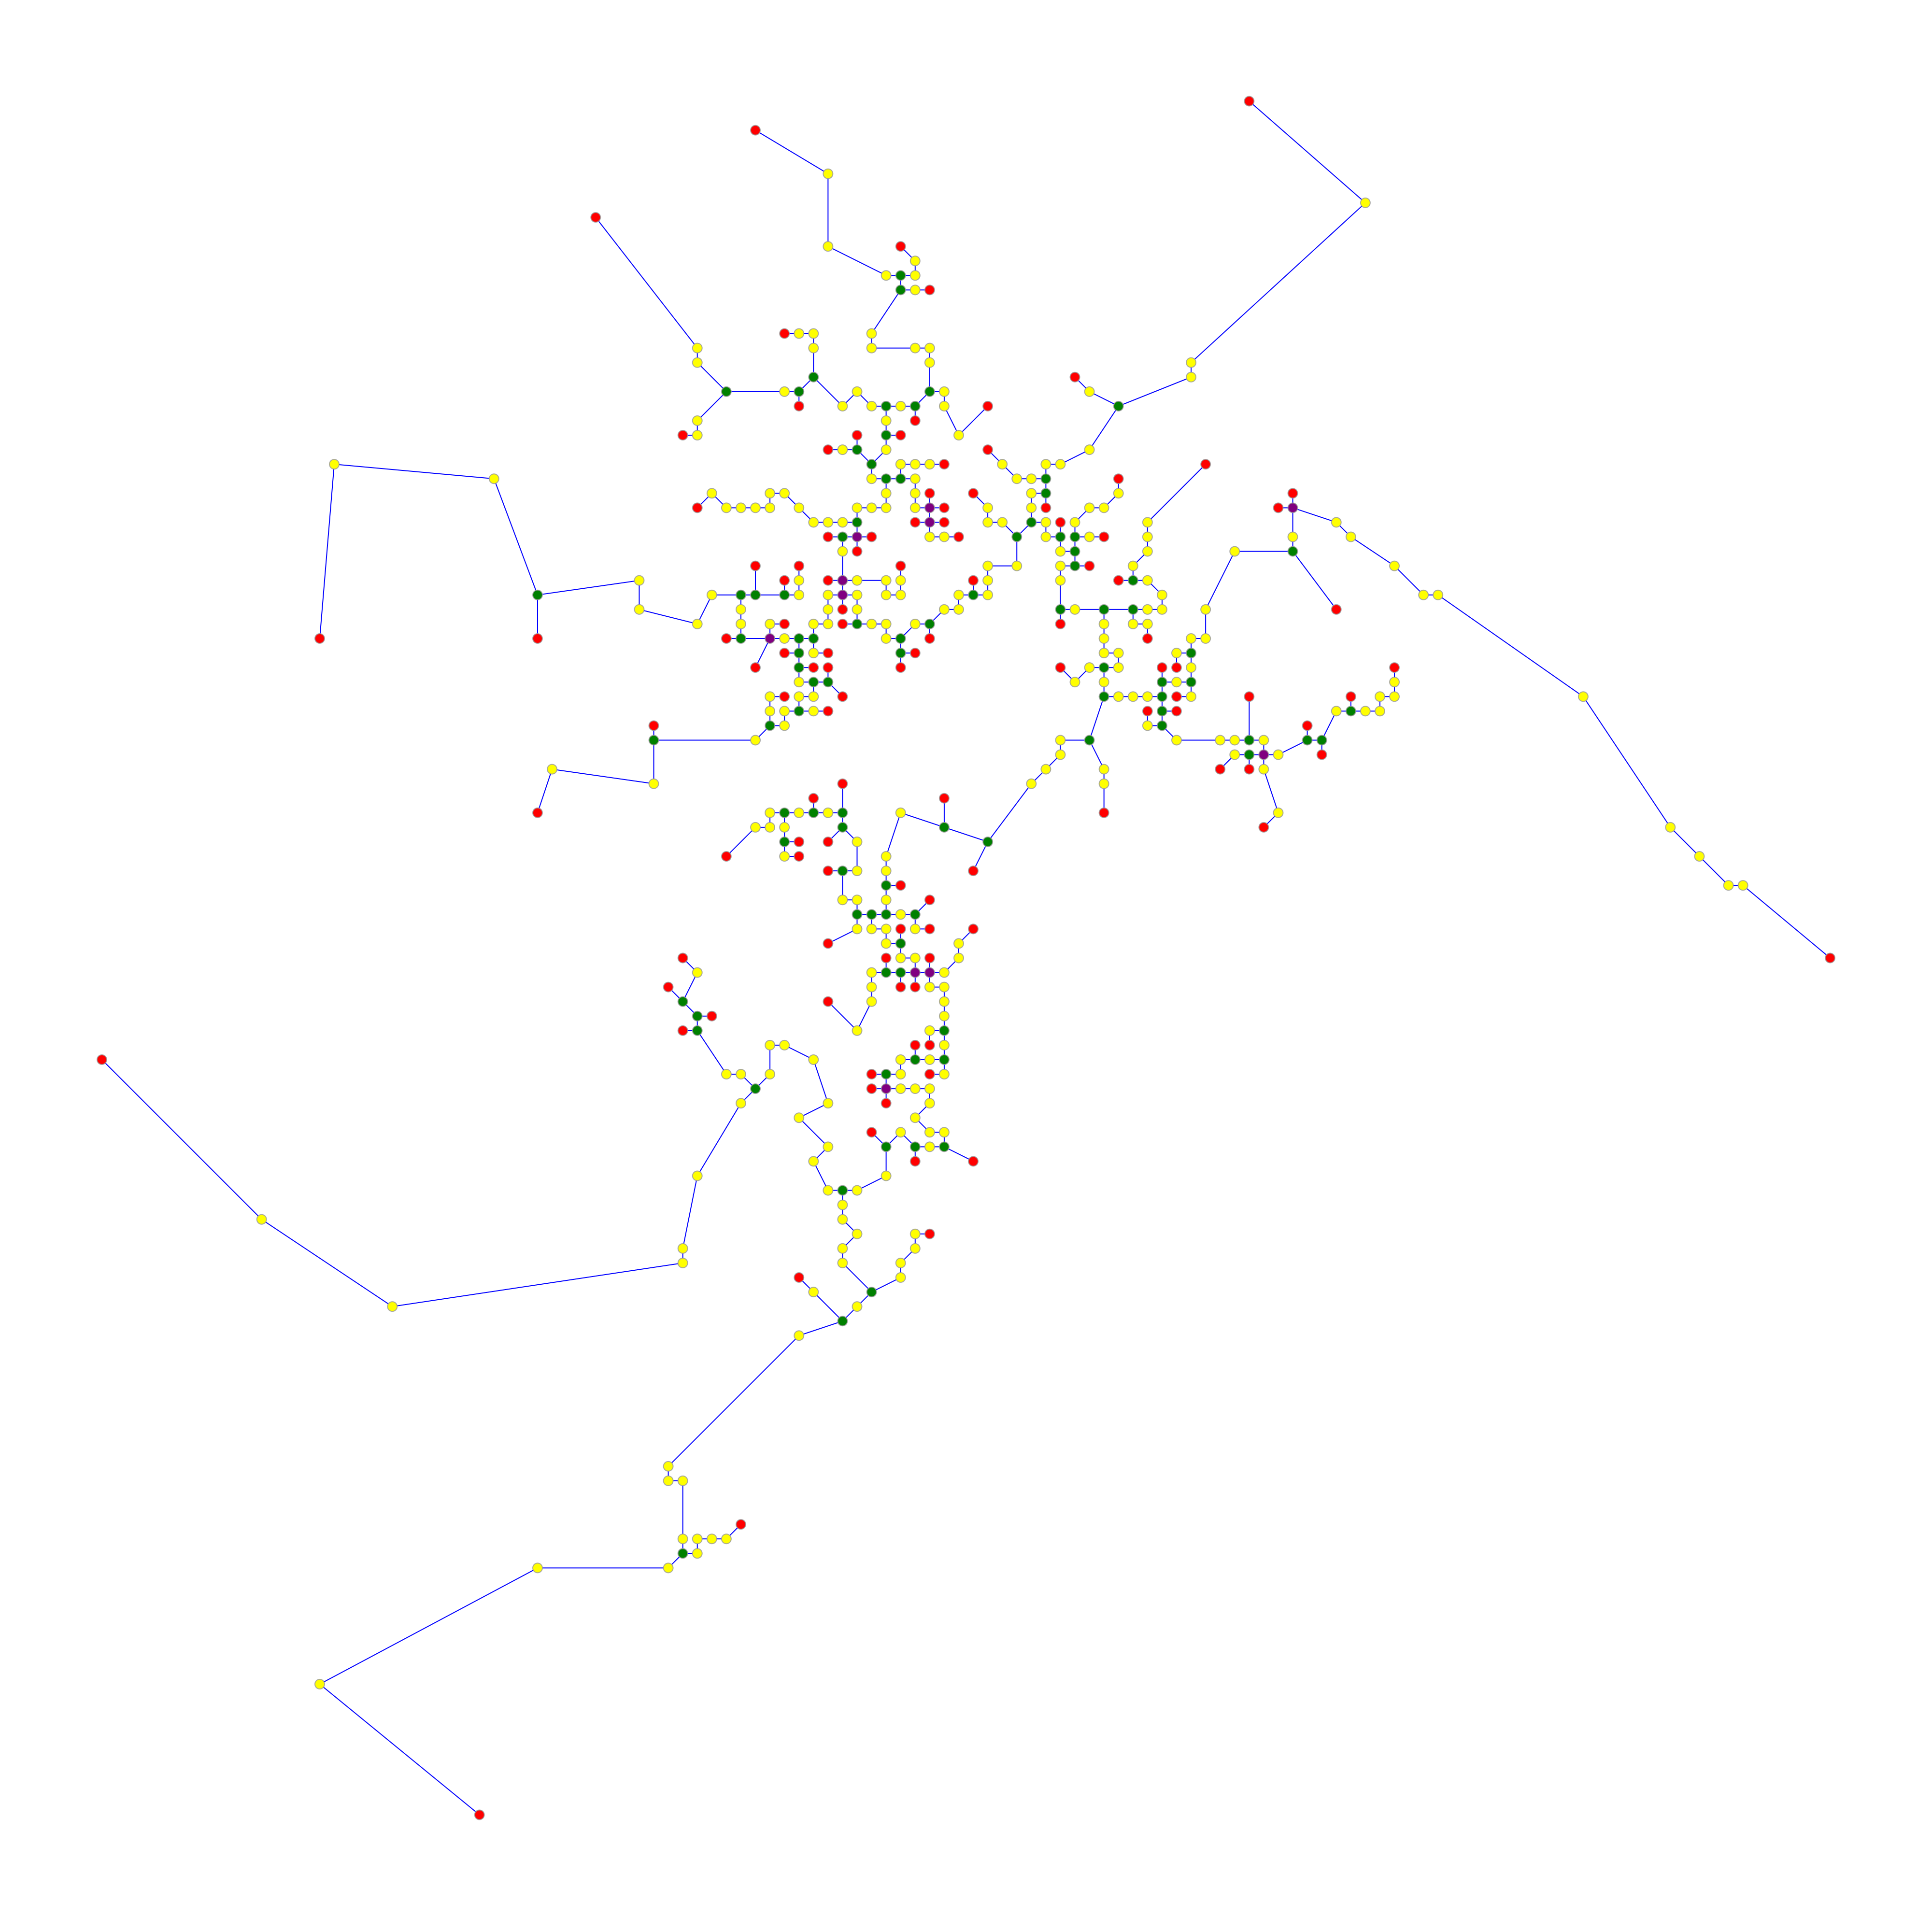

MST image saved to ./output/tokyo_pop_500_mst.png
MST .net file saved to ./MST_net/tokyo_pop_500_mst.net


In [1]:
from graph_tool.all import graph_draw, Graph, min_spanning_tree
import python_codes.files_operators as fo
import numpy as np


def generate_complete_graph_and_mst_with_colors(input_net, output_image, output_net):
    """
    Generate a complete graph using Euclidean distances, calculate its MST,
    set vertex colors by degree, save the MST image, and save it as a .net file.
    
    Parameters:
        input_net (str): Input .net file path containing node positions.
        output_image (str): Output image file path.
        output_net (str): Output .net file path.
    """
    # 读取网络文件，仅获取节点位置
    read_graph, read_pos = fo.read_files(input_net, True)
    num_vertices = read_graph.num_vertices()

    # 创建完全图
    complete_graph = Graph(directed=False)
    complete_graph.add_vertex(num_vertices)
    edge_weights = complete_graph.new_edge_property("double")

    # 添加所有节点之间的边及其权重（欧式距离）
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            source_pos = read_pos[complete_graph.vertex(i)]
            target_pos = read_pos[complete_graph.vertex(j)]
            euclidean_distance = np.sqrt((source_pos[0] - target_pos[0]) ** 2 +
                                         (source_pos[1] - target_pos[1]) ** 2)
            edge = complete_graph.add_edge(i, j)
            edge_weights[edge] = euclidean_distance

    # 计算最小生成树
    mst_edges = min_spanning_tree(complete_graph, weights=edge_weights)
    mst_graph = Graph(directed=False)
    mst_graph.add_vertex(num_vertices)
    mst_graph.add_edge_list((int(e.source()), int(e.target())) for e in complete_graph.edges() if mst_edges[e])

    # 创建最小生成树的节点位置属性
    mst_pos = mst_graph.new_vertex_property("vector<double>")
    for v in mst_graph.vertices():
        mst_pos[v] = read_pos[v]

    # 添加 'number' 属性到 mst_graph
    mst_numbers = mst_graph.new_vertex_property("int")
    for v in mst_graph.vertices():
        mst_numbers[v] = int(v) + 1  # 从 1 开始编号
    mst_graph.vertex_properties['number'] = mst_numbers

    # 设置颜色映射
    color_map = ['red', 'yellow', 'green', 'purple', 'blue', 'orange', 'pink', 'brown', 'cyan', 'gray']

    # 设置最小生成树节点颜色属性
    mst_vertex_degrees = mst_graph.get_total_degrees(mst_graph.get_vertices())
    mst_vertex_colors = mst_graph.new_vertex_property("string")
    for v in mst_graph.vertices():
        degree = int(mst_vertex_degrees[int(v)])
        # 度数 -1 对应颜色索引，度数超过 color_map 范围默认灰色
        mst_vertex_colors[v] = color_map[degree - 1] if degree <= len(color_map) else 'gray'

    # 计算最小生成树的边长度总和
    mst_total_length = np.sum([
        edge_weights[complete_graph.edge(e.source(), e.target())] for e in mst_graph.edges()
    ])
    print("Total length of Minimum Spanning Tree (Euclidean distance):", mst_total_length)

    # 绘制最小生成树并保存图片
    graph_draw(mst_graph, mst_pos, vertex_size=10, edge_color='blue', vertex_fill_color=mst_vertex_colors,
               output_size=(2000, 2000))
    graph_draw(mst_graph, mst_pos, vertex_size=10, edge_color='blue', vertex_fill_color=mst_vertex_colors,
               output_size=(2000, 2000), output=output_image)
    print(f"MST image saved to {output_image}")

    # 保存最小生成树为 .net 文件
    fo.save_files(output_net, mst_graph, mst_pos, position_flag=True)
    print(f"MST .net file saved to {output_net}")


# 示例使用
city = 'tokyo'
scale = '500'
input_net_file = f"./pop/{city}_{scale}_population.net"
output_image_file = f"./output/{city}_pop_{scale}_mst.png"
output_net_file = f"./MST_net/{city}_pop_{scale}_mst.net"

generate_complete_graph_and_mst_with_colors(input_net_file, output_image_file, output_net_file)


In [15]:
from graph_tool.all import graph_draw, Graph, min_spanning_tree
import python_codes.files_operators as fo
import numpy as np


def generate_complete_graph_and_mst_with_colors(input_net, output_image, output_net):
    """
    Generate a complete graph using Euclidean distances, calculate its MST,
    set vertex colors by degree, save the MST image, and save it as a .net file.
    
    Parameters:
        input_net (str): Input .net file path containing node positions.
        output_image (str): Output image file path.
        output_net (str): Output .net file path.
    """
    # 读取网络文件，仅获取节点位置
    read_graph, read_pos = fo.read_files(input_net, True)
    num_vertices = read_graph.num_vertices()

    # 创建完全图
    complete_graph = Graph(directed=False)
    complete_graph.add_vertex(num_vertices)
    edge_weights = complete_graph.new_edge_property("double")

    # 添加所有节点之间的边及其权重（欧式距离）
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            source_pos = read_pos[complete_graph.vertex(i)]
            target_pos = read_pos[complete_graph.vertex(j)]
            euclidean_distance = np.sqrt((source_pos[0] - target_pos[0]) ** 2 +
                                         (source_pos[1] - target_pos[1]) ** 2)
            edge = complete_graph.add_edge(i, j)
            edge_weights[edge] = euclidean_distance

    # 计算最小生成树
    mst_edges = min_spanning_tree(complete_graph, weights=edge_weights)
    mst_graph = Graph(directed=False)
    mst_graph.add_vertex(num_vertices)
    mst_graph.add_edge_list((int(e.source()), int(e.target())) for e in complete_graph.edges() if mst_edges[e])

    # 创建最小生成树的节点位置属性
    mst_pos = mst_graph.new_vertex_property("vector<double>")
    for v in mst_graph.vertices():
        mst_pos[v] = read_pos[v]

    # 添加 'number' 属性到 mst_graph
    mst_numbers = mst_graph.new_vertex_property("int")
    for v in mst_graph.vertices():
        mst_numbers[v] = int(v) + 1  # 从 1 开始编号
    mst_graph.vertex_properties['number'] = mst_numbers

    # 设置颜色映射
    color_map = ['red',  'gray']

    # 设置最小生成树节点颜色属性
    mst_vertex_degrees = mst_graph.get_total_degrees(mst_graph.get_vertices())
    mst_vertex_colors = mst_graph.new_vertex_property("string")
    for v in mst_graph.vertices():
        degree = int(mst_vertex_degrees[int(v)])
        # 度数 -1 对应颜色索引，度数超过 color_map 范围默认灰色
        mst_vertex_colors[v] = color_map[degree - 1] if degree <= len(color_map) else 'gray'

    # 计算最小生成树的边长度总和
    mst_total_length = np.sum([
        edge_weights[complete_graph.edge(e.source(), e.target())] for e in mst_graph.edges()
    ])
    print("Total length of Minimum Spanning Tree (Euclidean distance):", mst_total_length)

    # 绘制最小生成树并保存图片
    graph_draw(mst_graph, mst_pos, vertex_size=8, edge_color='gray', vertex_fill_color=mst_vertex_colors,
               output_size=(4000, 4000))
    graph_draw(mst_graph, mst_pos, vertex_size=8, edge_color='gray', vertex_fill_color=mst_vertex_colors,
               output_size=(4000, 4000), output=output_image)
    print(f"MST image saved to {output_image}")

    # 保存最小生成树为 .net 文件
    fo.save_files(output_net, mst_graph, mst_pos, position_flag=True)
    print(f"MST .net file saved to {output_net}")


# 示例使用
city = 'tokyo'
scale = '5000'
input_net_file = f"./pop/{city}_{scale}_population.net"
output_image_file = f"./output/mst/{city}_pop_{scale}_mst.png"

generate_complete_graph_and_mst_with_colors(input_net_file, output_image_file, output_net_file)


Total length of Minimum Spanning Tree (Euclidean distance): 2824.463126331104


MST image saved to ./output/mst/tokyo_pop_5000_mst.png
MST .net file saved to ./MST_net/tokyo_pop_500_mst.net
